# ML Project - Drug Classification

The point of this project is to try some machine learning techniques to predict the outcome of the drugs that might be accurate for a patient.




## Data Preprocessing and EDA

When building a machine learning model or algorithm, the data needs to be clean for better performance and I also want to investigate, visualize and analyze the data to gain insight on the data that I'm working with. 


In [414]:
# Now first I have to import all the needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [415]:
# then I load the data that I'll be using
drug = pd.read_csv('drug200.csv')

In [416]:
# Let's just check if the load-in worked fine
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Load-in worked well.

In [417]:
# looking at the shape of the data
print(drug.shape)


(200, 6)


In [418]:
# exploring the structure, colmuns, non-null count and dtypes with ".info()"
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [419]:
# exploring numeric statistics
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Doesn't look out of the ordinary, on the face of it. The count is 200 for both, which indicates there are no missing values. 

In [420]:
# exlporing null-values in more detail
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

After some initial exploration with info, describe etc...

I've concluded that:
- In total 6 columns
- 2 of them are numerical features
- 4 of them are categorical features.
- There are no null values

### visualization

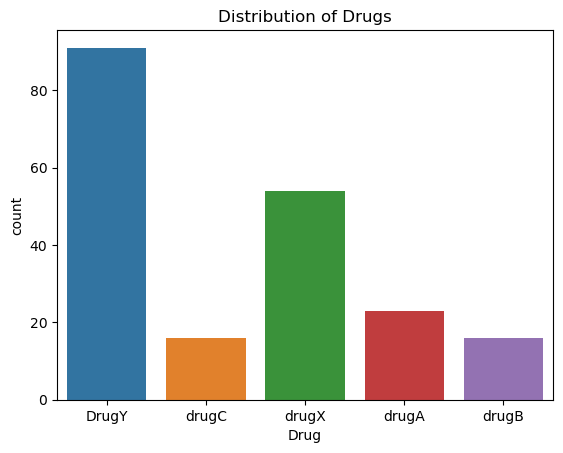

In [421]:
# Plot a histogram of the target variable
sns.countplot(x='Drug', data=drug)
plt.title('Distribution of Drugs')
plt.show()

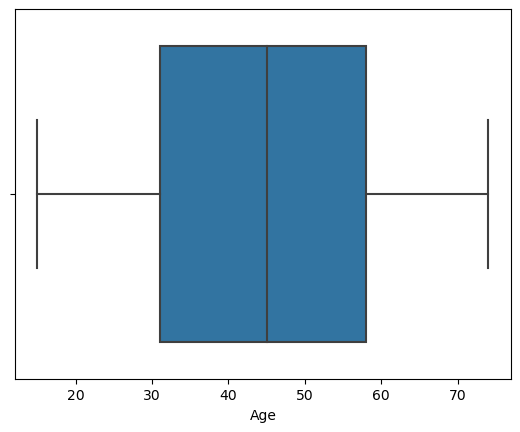

In [422]:
# Plot a boxplot of age distribution
sns.boxplot(x='Age', data=drug)
plt.show()

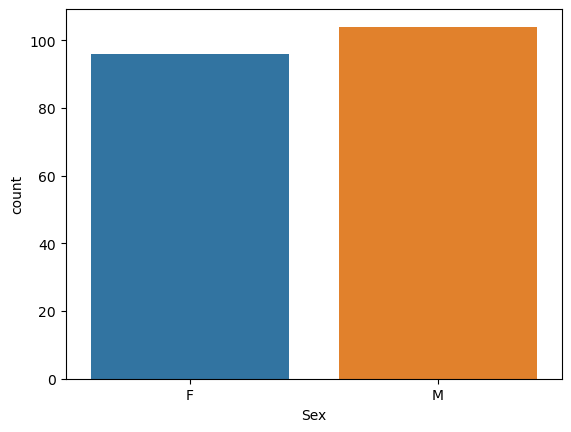

In [423]:
# Create Sex bar plot
sns.countplot(x='Sex', data=drug)
plt.show()

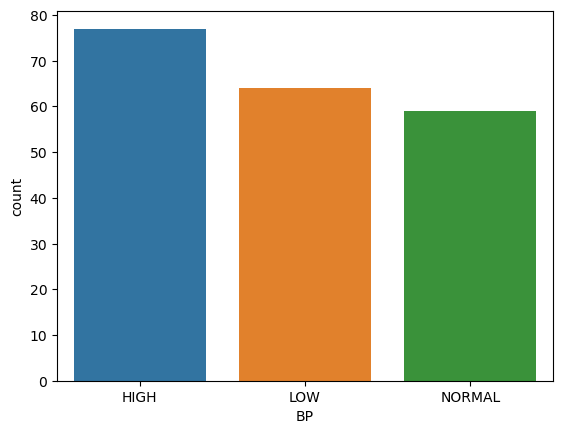

In [424]:
# Create BP bar plot
sns.countplot(x='BP', data=drug)
plt.show()

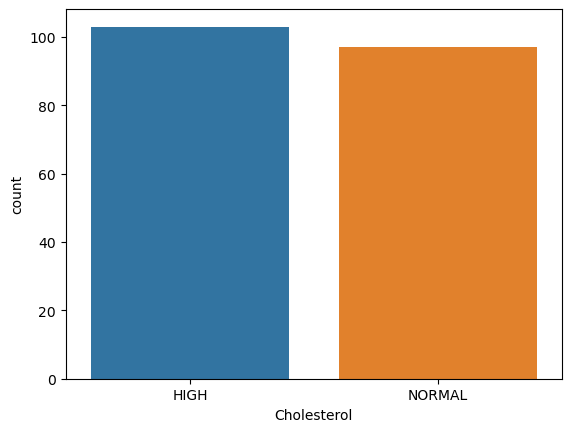

In [425]:
# Create Cholesterol bar plot
sns.countplot(x='Cholesterol', data=drug)
plt.show()

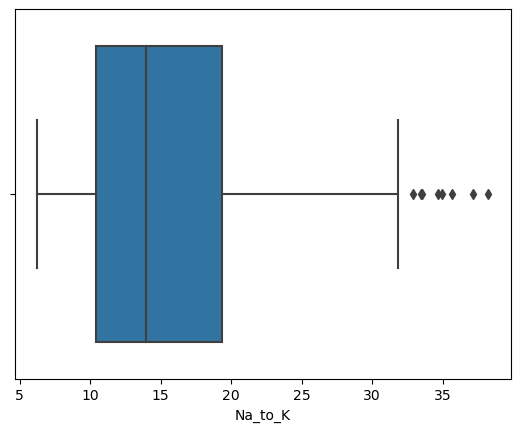

In [426]:
# Plot a boxplot of sodium-to-potassium ratio distribution
sns.boxplot(x='Na_to_K', data=drug)
plt.show()

**Note**
- It looks like there are potential ouliers, I'll investigtte that further

C:\Users\HP\AppData\Local\Temp\ipykernel_14888\3532976621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = drug.corr()


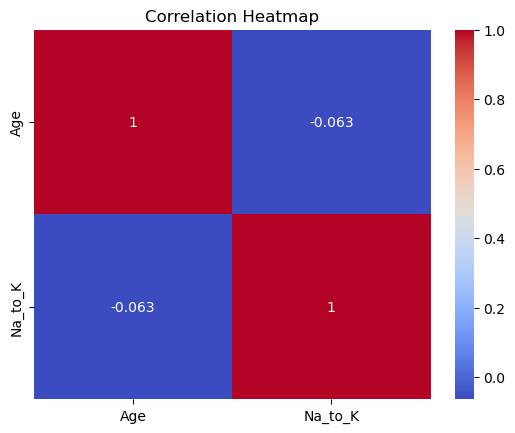

In [427]:
# Correlation heatmap on numerical values
correlation_matrix = drug.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

Seems to be weak correlation between Age and Na_to_K

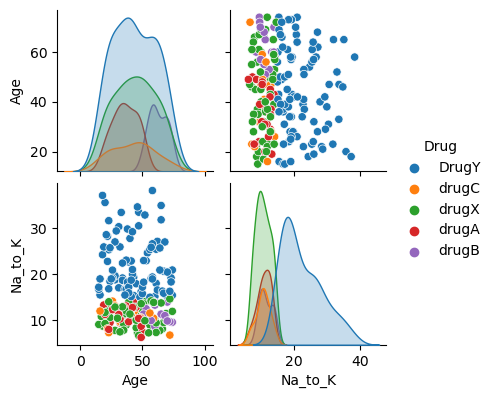

In [428]:
# pairplot on numerical values
sns.pairplot(drug, hue="Drug", height=2)
plt.show()

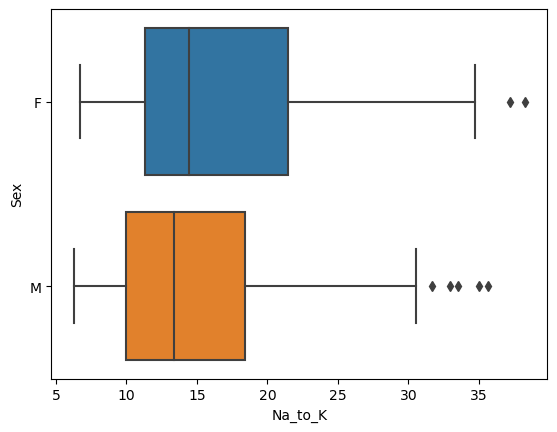

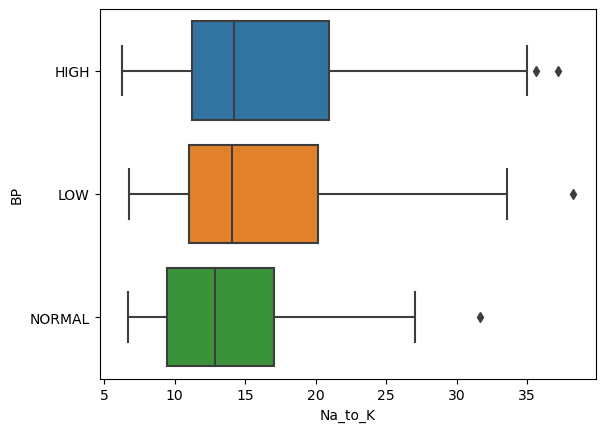

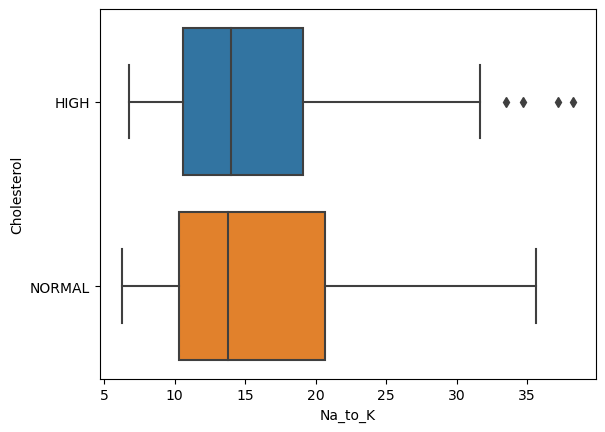

In [429]:
# Plot a boxplot of sodium-to-potassium ratio and Sex features
sns.boxplot(x='Na_to_K', y='Sex', data=drug)
plt.show()

# Plot a boxplot of sodium-to-potassium ratio and BP features
sns.boxplot(x='Na_to_K', y='BP', data=drug)
plt.show()

# Plot a boxplot of sodium-to-potassium ratio and Cholesterol features
sns.boxplot(x='Na_to_K', y='Cholesterol', data=drug)
plt.show()

I would like to handle these ouliers. I will do that next.

In [430]:
# Calculate quartiles and IQR for the 'Na_to_K' variable
Q1 = drug['Na_to_K'].quantile(0.25)
Q3 = drug['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers in the 'Na_to_K' variable
outliers = drug[(drug['Na_to_K'] < lower_bound) | (drug['Na_to_K'] > upper_bound)]

# Remove the outliers from the DataFrame
drug = drug.drop(outliers.index)

# Reset the index of the DataFrame
drug = drug.reset_index(drop=True)

# Print the updated DataFrame without outliers
print(drug)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
187   56   F     LOW        HIGH   11.567  drugC
188   16   M     LOW        HIGH   12.006  drugC
189   52   M  NORMAL        HIGH    9.894  drugX
190   23   M  NORMAL      NORMAL   14.020  drugX
191   40   F     LOW      NORMAL   11.349  drugX

[192 rows x 6 columns]


In [431]:
# Define the bin edges for age groups
bin_edges = [0, 18, 30, 45, 60, float('inf')]

# Define the labels for the age groups
bin_labels = ['<18', '18-30', '30-45', '45-60', '60+']

# Create the 'AgeGroup' column by binning the 'Age' variable
drug['AgeGroup'] = pd.cut(drug['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the updated DataFrame
print(drug.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug AgeGroup
0   23   F    HIGH        HIGH   25.355  DrugY    18-30
1   47   M     LOW        HIGH   13.093  drugC    45-60
2   47   M     LOW        HIGH   10.114  drugC    45-60
3   28   F  NORMAL        HIGH    7.798  drugX    18-30
4   61   F     LOW        HIGH   18.043  DrugY      60+


In [432]:
# Change the categorical variable to numbers through encoding

# import encoders from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# I used a OrdinalEncoder on the Blood Pressure feature, since it has the categories LOW, NORMAL and HIGH
encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
encoder.fit(drug[['BP']])
encoded_values = encoder.transform(drug[['BP']])
drug['BP'] = encoded_values

# I also used a OrdinalEncoder on the Cholesterol feature, since it has the categories NORMAL and HIGH
encoder = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
encoder.fit(drug[['Cholesterol']])
encoded_values = encoder.transform(drug[['Cholesterol']])
drug['Cholesterol'] = encoded_values

# Then I used a OneHotEncoder the Sex feature, since it has only two categories and therefor don't create tons of new features
encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(drug[['Sex']])
drug['Sex'] = encoded_values

# Then I used a LabelEncoder for the AgeGroup feature
label_encoder = LabelEncoder()
drug['AgeGroup'] = label_encoder.fit_transform(drug['AgeGroup'])

# Then in the end I used a LabelEncoder for the target
label_encoder = LabelEncoder()
drug['Drug'] = label_encoder.fit_transform(drug['Drug'])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [433]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,AgeGroup
0,23,1.0,2.0,1.0,25.355,0,0
1,47,0.0,0.0,1.0,13.093,3,2
2,47,0.0,0.0,1.0,10.114,3,2
3,28,1.0,1.0,1.0,7.798,4,0
4,61,1.0,0.0,1.0,18.043,0,3


In [434]:
# seperate features and target
X = drug.drop(columns=['Drug'])
y = drug['Drug']

In [435]:
# Scale the data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
drug = pd.DataFrame(scaler.fit_transform(drug), columns=drug.columns)

In [436]:
X

,Age,Sex,BP,Cholesterol,Na_to_K,AgeGroup
0,23,1.0,2.0,1.0,25.355,0
1,47,0.0,0.0,1.0,13.093,2
2,47,0.0,0.0,1.0,10.114,2
3,28,1.0,1.0,1.0,7.798,0
4,61,1.0,0.0,1.0,18.043,3
...,...,...,...,...,...,...
187,56,1.0,0.0,1.0,11.567,2
188,16,0.0,0.0,1.0,12.006,4
189,52,0.0,1.0,1.0,9.894,2
190,23,0.0,1.0,0.0,14.020,0


In [437]:
from sklearn.ensemble import RandomForestClassifier

# Create a tree-based model
model = RandomForestClassifier()

# Fit the model to my data
model.fit(X, y)

# Get the feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance Score": importance_scores
})

# Sort the features by their importance scores
feature_importance_df = feature_importance_df.sort_values(by="Importance Score", ascending=False)

# Print the feature importance scores
print(feature_importance_df)


       Feature  Importance Score
4      Na_to_K          0.526346
2           BP          0.238792
0          Age          0.124820
3  Cholesterol          0.051096
5     AgeGroup          0.043459
1          Sex          0.015488


In [438]:
y

0      0
1      3
2      3
3      4
4      0
      ..
187    3
188    3
189    4
190    4
191    4
Name: Drug, Length: 192, dtype: int32

In [439]:
X = drug[['Na_to_K','BP','Age']]

In [440]:
y

0      0
1      3
2      3
3      4
4      0
      ..
187    3
188    3
189    4
190    4
191    4
Name: Drug, Length: 192, dtype: int32

## Model Building and Evaluation

In [441]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [442]:
# Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [443]:
# predict using RandomForest
y_pred = rfc.predict(X_test)
print(y_pred)

[1 0 0 4 4 3 0 3 3 0 3 0 4 1 3 2 1 2 4 0 1 4 0 1 0 1 0 0 1 4 4 3 0 0 0 4 1
 1 4]


In [444]:
# evaluation of the RandomForest model with Accuracy, Precision, Recall and F1-Score + a classification report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rfc, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Cross-Validation Scores Mean:", scores.mean())

Accuracy:  0.8717948717948718
Precision:  0.8444444444444444
Recall:  0.8717948717948717
F1-Score:  0.8118716577540107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3
           3       0.33      1.00      0.50         2
           4       1.00      0.69      0.82        13

    accuracy                           0.87        39
   macro avg       0.84      0.87      0.81        39
weighted avg       0.94      0.87      0.89        39

Cross-Validation Scores: [0.92307692 0.94871795 0.94736842 0.92105263 0.89473684]
Cross-Validation Scores Mean: 0.9269905533063427


In [445]:
# LogisticRegression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [446]:
# predict using LogisticRegression
y_pred = lr.predict(X_test)
print(y_pred)

[1 0 0 4 4 3 1 3 4 0 3 0 4 1 4 2 1 2 4 0 1 4 0 1 0 1 0 0 1 4 4 4 0 0 0 4 2
 1 4]


In [447]:
# evaluation of the LogisticRegression model

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(lr, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Cross-Validation Scores Mean:", scores.mean())

Accuracy:  0.8974358974358975
Precision:  0.8277777777777778
Recall:  0.8538461538461538
F1-Score:  0.8362352941176472
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         3
           3       0.33      0.50      0.40         2
           4       0.92      0.85      0.88        13

    accuracy                           0.90        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.92      0.90      0.90        39

Cross-Validation Scores: [0.82051282 0.92307692 0.89473684 0.78947368 0.84210526]
Cross-Validation Scores Mean: 0.8539811066126856


In [448]:
# Define the classifiers and their respective parameter grids
classifiers = [
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2']
    })
]

best_score = 0.0
best_model = None

# Iterate over the classifiers
for name, clf, param_grid in classifiers:
    # Create the GridSearchCV object for each classifier
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    
    # Perform grid search
    grid_search.fit(X, y)
    
    # Check if the current model has a better score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        
        print("New Best Model Selected:")
        print("Classifier:", name)
        print("Best Hyperparameters:", grid_search.best_params_)
        print("Best Score:", best_score)
        print()

New Best Model Selected:
Classifier: Random Forest
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9215924426450741



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

## Conclusion
I have done as much as I've chould but ran out of time, If I had more time I'd try to evalute further and make it so that I can make a better model selection. I also would like to dig deeper in to these topics and learn more.